## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9785420	total: 58.6ms	remaining: 58.5s
1:	learn: 0.9582402	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9371596	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9206206	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9025497	total: 62.8ms	remaining: 12.5s
5:	learn: 0.8876550	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8700767	total: 64.8ms	remaining: 9.19s
7:	learn: 0.8524394	total: 65.9ms	remaining: 8.17s
8:	learn: 0.8358493	total: 66.8ms	remaining: 7.35s
9:	learn: 0.8193155	total: 67.6ms	remaining: 6.69s
10:	learn: 0.8042235	total: 68.5ms	remaining: 6.16s
11:	learn: 0.7897908	total: 69.3ms	remaining: 5.7s
12:	learn: 0.7740856	total: 70.1ms	remaining: 5.32s
13:	learn: 0.7588054	total: 71ms	remaining: 5s
14:	learn: 0.7460372	total: 71.8ms	remaining: 4.71s
15:	learn: 0.7322559	total: 72.6ms	remaining: 4.46s
16:	learn: 0.7200824	total: 73.5ms	remaining: 4.25s
17:	learn: 0.7073940	total: 74.5ms	remaining: 4.06s
18:	learn: 0.6947860	total: 75.3ms	remaining: 3.89

58:	learn: 0.4028330	total: 110ms	remaining: 1.75s
59:	learn: 0.3982549	total: 110ms	remaining: 1.73s
60:	learn: 0.3945689	total: 111ms	remaining: 1.71s
61:	learn: 0.3909006	total: 112ms	remaining: 1.7s
62:	learn: 0.3871164	total: 113ms	remaining: 1.68s
63:	learn: 0.3832426	total: 114ms	remaining: 1.66s
64:	learn: 0.3797874	total: 115ms	remaining: 1.65s
65:	learn: 0.3760431	total: 116ms	remaining: 1.63s
66:	learn: 0.3721904	total: 117ms	remaining: 1.63s
67:	learn: 0.3689814	total: 118ms	remaining: 1.62s
68:	learn: 0.3663189	total: 119ms	remaining: 1.6s
69:	learn: 0.3629093	total: 120ms	remaining: 1.59s
70:	learn: 0.3594882	total: 121ms	remaining: 1.58s
71:	learn: 0.3563029	total: 122ms	remaining: 1.57s
72:	learn: 0.3531679	total: 122ms	remaining: 1.55s
73:	learn: 0.3503304	total: 123ms	remaining: 1.54s
74:	learn: 0.3474776	total: 124ms	remaining: 1.53s
75:	learn: 0.3451758	total: 125ms	remaining: 1.52s
76:	learn: 0.3423874	total: 126ms	remaining: 1.51s
77:	learn: 0.3395958	total: 127ms

150:	learn: 0.2372992	total: 192ms	remaining: 1.08s
151:	learn: 0.2367154	total: 193ms	remaining: 1.08s
152:	learn: 0.2358381	total: 194ms	remaining: 1.07s
153:	learn: 0.2349686	total: 195ms	remaining: 1.07s
154:	learn: 0.2343242	total: 196ms	remaining: 1.07s
155:	learn: 0.2334153	total: 197ms	remaining: 1.07s
156:	learn: 0.2328734	total: 198ms	remaining: 1.06s
157:	learn: 0.2318353	total: 199ms	remaining: 1.06s
158:	learn: 0.2310587	total: 200ms	remaining: 1.06s
159:	learn: 0.2304041	total: 201ms	remaining: 1.05s
160:	learn: 0.2296585	total: 202ms	remaining: 1.05s
161:	learn: 0.2289634	total: 202ms	remaining: 1.05s
162:	learn: 0.2284675	total: 203ms	remaining: 1.04s
163:	learn: 0.2279994	total: 204ms	remaining: 1.04s
164:	learn: 0.2272746	total: 205ms	remaining: 1.04s
165:	learn: 0.2265558	total: 206ms	remaining: 1.03s
166:	learn: 0.2257286	total: 207ms	remaining: 1.03s
167:	learn: 0.2253470	total: 208ms	remaining: 1.03s
168:	learn: 0.2248204	total: 208ms	remaining: 1.02s
169:	learn: 

273:	learn: 0.1698409	total: 301ms	remaining: 798ms
274:	learn: 0.1694684	total: 302ms	remaining: 797ms
275:	learn: 0.1692197	total: 303ms	remaining: 796ms
276:	learn: 0.1688083	total: 304ms	remaining: 795ms
277:	learn: 0.1684501	total: 305ms	remaining: 793ms
278:	learn: 0.1680274	total: 306ms	remaining: 792ms
279:	learn: 0.1676075	total: 307ms	remaining: 790ms
280:	learn: 0.1672081	total: 308ms	remaining: 788ms
281:	learn: 0.1668764	total: 309ms	remaining: 787ms
282:	learn: 0.1665376	total: 310ms	remaining: 786ms
283:	learn: 0.1661193	total: 311ms	remaining: 784ms
284:	learn: 0.1655241	total: 312ms	remaining: 783ms
285:	learn: 0.1652583	total: 313ms	remaining: 781ms
286:	learn: 0.1647557	total: 314ms	remaining: 780ms
287:	learn: 0.1642499	total: 315ms	remaining: 779ms
288:	learn: 0.1639184	total: 316ms	remaining: 777ms
289:	learn: 0.1635186	total: 317ms	remaining: 775ms
290:	learn: 0.1631462	total: 317ms	remaining: 773ms
291:	learn: 0.1626621	total: 318ms	remaining: 772ms
292:	learn: 

365:	learn: 0.1391068	total: 384ms	remaining: 664ms
366:	learn: 0.1388312	total: 385ms	remaining: 663ms
367:	learn: 0.1385419	total: 385ms	remaining: 662ms
368:	learn: 0.1383080	total: 386ms	remaining: 661ms
369:	learn: 0.1380365	total: 387ms	remaining: 659ms
370:	learn: 0.1378760	total: 388ms	remaining: 658ms
371:	learn: 0.1375934	total: 389ms	remaining: 657ms
372:	learn: 0.1375596	total: 390ms	remaining: 655ms
373:	learn: 0.1373859	total: 391ms	remaining: 654ms
374:	learn: 0.1373353	total: 392ms	remaining: 653ms
375:	learn: 0.1371479	total: 393ms	remaining: 651ms
376:	learn: 0.1367831	total: 393ms	remaining: 650ms
377:	learn: 0.1365540	total: 394ms	remaining: 649ms
378:	learn: 0.1362684	total: 395ms	remaining: 647ms
379:	learn: 0.1358854	total: 396ms	remaining: 646ms
380:	learn: 0.1356796	total: 397ms	remaining: 645ms
381:	learn: 0.1355391	total: 398ms	remaining: 643ms
382:	learn: 0.1353489	total: 399ms	remaining: 642ms
383:	learn: 0.1349557	total: 399ms	remaining: 641ms
384:	learn: 

491:	learn: 0.1104055	total: 492ms	remaining: 508ms
492:	learn: 0.1101329	total: 493ms	remaining: 507ms
493:	learn: 0.1098534	total: 494ms	remaining: 506ms
494:	learn: 0.1095835	total: 495ms	remaining: 505ms
495:	learn: 0.1094923	total: 496ms	remaining: 504ms
496:	learn: 0.1092452	total: 496ms	remaining: 502ms
497:	learn: 0.1090968	total: 497ms	remaining: 501ms
498:	learn: 0.1089983	total: 498ms	remaining: 500ms
499:	learn: 0.1087442	total: 499ms	remaining: 499ms
500:	learn: 0.1087059	total: 500ms	remaining: 498ms
501:	learn: 0.1086355	total: 501ms	remaining: 497ms
502:	learn: 0.1083442	total: 502ms	remaining: 496ms
503:	learn: 0.1082703	total: 503ms	remaining: 495ms
504:	learn: 0.1081990	total: 504ms	remaining: 494ms
505:	learn: 0.1078611	total: 504ms	remaining: 492ms
506:	learn: 0.1076841	total: 505ms	remaining: 491ms
507:	learn: 0.1074877	total: 506ms	remaining: 490ms
508:	learn: 0.1071780	total: 507ms	remaining: 489ms
509:	learn: 0.1069848	total: 508ms	remaining: 488ms
510:	learn: 

584:	learn: 0.0942945	total: 574ms	remaining: 407ms
585:	learn: 0.0941459	total: 575ms	remaining: 406ms
586:	learn: 0.0939861	total: 577ms	remaining: 406ms
587:	learn: 0.0938260	total: 577ms	remaining: 405ms
588:	learn: 0.0936530	total: 578ms	remaining: 404ms
589:	learn: 0.0934780	total: 579ms	remaining: 402ms
590:	learn: 0.0932171	total: 580ms	remaining: 401ms
591:	learn: 0.0930856	total: 581ms	remaining: 400ms
592:	learn: 0.0929181	total: 582ms	remaining: 399ms
593:	learn: 0.0926072	total: 583ms	remaining: 398ms
594:	learn: 0.0924118	total: 584ms	remaining: 397ms
595:	learn: 0.0923094	total: 585ms	remaining: 396ms
596:	learn: 0.0920228	total: 585ms	remaining: 395ms
597:	learn: 0.0918190	total: 587ms	remaining: 394ms
598:	learn: 0.0915813	total: 588ms	remaining: 393ms
599:	learn: 0.0914076	total: 589ms	remaining: 392ms
600:	learn: 0.0913768	total: 590ms	remaining: 391ms
601:	learn: 0.0911607	total: 590ms	remaining: 390ms
602:	learn: 0.0911200	total: 591ms	remaining: 389ms
603:	learn: 

706:	learn: 0.0788057	total: 683ms	remaining: 283ms
707:	learn: 0.0787104	total: 684ms	remaining: 282ms
708:	learn: 0.0785450	total: 685ms	remaining: 281ms
709:	learn: 0.0784122	total: 686ms	remaining: 280ms
710:	learn: 0.0783856	total: 687ms	remaining: 279ms
711:	learn: 0.0783598	total: 687ms	remaining: 278ms
712:	learn: 0.0782967	total: 688ms	remaining: 277ms
713:	learn: 0.0781154	total: 689ms	remaining: 276ms
714:	learn: 0.0779445	total: 690ms	remaining: 275ms
715:	learn: 0.0777994	total: 691ms	remaining: 274ms
716:	learn: 0.0776452	total: 692ms	remaining: 273ms
717:	learn: 0.0775211	total: 693ms	remaining: 272ms
718:	learn: 0.0774240	total: 694ms	remaining: 271ms
719:	learn: 0.0772973	total: 694ms	remaining: 270ms
720:	learn: 0.0772469	total: 695ms	remaining: 269ms
721:	learn: 0.0771922	total: 696ms	remaining: 268ms
722:	learn: 0.0770560	total: 697ms	remaining: 267ms
723:	learn: 0.0769582	total: 698ms	remaining: 266ms
724:	learn: 0.0768175	total: 699ms	remaining: 265ms
725:	learn: 

801:	learn: 0.0676835	total: 766ms	remaining: 189ms
802:	learn: 0.0676059	total: 767ms	remaining: 188ms
803:	learn: 0.0674778	total: 768ms	remaining: 187ms
804:	learn: 0.0674440	total: 769ms	remaining: 186ms
805:	learn: 0.0674072	total: 770ms	remaining: 185ms
806:	learn: 0.0672957	total: 771ms	remaining: 184ms
807:	learn: 0.0671312	total: 772ms	remaining: 183ms
808:	learn: 0.0670378	total: 772ms	remaining: 182ms
809:	learn: 0.0670068	total: 773ms	remaining: 181ms
810:	learn: 0.0669162	total: 774ms	remaining: 180ms
811:	learn: 0.0667944	total: 775ms	remaining: 179ms
812:	learn: 0.0666660	total: 776ms	remaining: 178ms
813:	learn: 0.0665478	total: 777ms	remaining: 177ms
814:	learn: 0.0664229	total: 778ms	remaining: 177ms
815:	learn: 0.0663574	total: 779ms	remaining: 176ms
816:	learn: 0.0662329	total: 779ms	remaining: 175ms
817:	learn: 0.0661493	total: 780ms	remaining: 174ms
818:	learn: 0.0660679	total: 781ms	remaining: 173ms
819:	learn: 0.0659681	total: 782ms	remaining: 172ms
820:	learn: 

925:	learn: 0.0575034	total: 874ms	remaining: 69.9ms
926:	learn: 0.0574689	total: 876ms	remaining: 68.9ms
927:	learn: 0.0573397	total: 876ms	remaining: 68ms
928:	learn: 0.0573226	total: 877ms	remaining: 67ms
929:	learn: 0.0572239	total: 878ms	remaining: 66.1ms
930:	learn: 0.0571567	total: 879ms	remaining: 65.1ms
931:	learn: 0.0571059	total: 880ms	remaining: 64.2ms
932:	learn: 0.0570165	total: 881ms	remaining: 63.2ms
933:	learn: 0.0569596	total: 882ms	remaining: 62.3ms
934:	learn: 0.0568870	total: 882ms	remaining: 61.3ms
935:	learn: 0.0567571	total: 883ms	remaining: 60.4ms
936:	learn: 0.0566382	total: 884ms	remaining: 59.4ms
937:	learn: 0.0565385	total: 885ms	remaining: 58.5ms
938:	learn: 0.0564695	total: 886ms	remaining: 57.6ms
939:	learn: 0.0563904	total: 887ms	remaining: 56.6ms
940:	learn: 0.0563121	total: 888ms	remaining: 55.7ms
941:	learn: 0.0562431	total: 889ms	remaining: 54.7ms
942:	learn: 0.0561442	total: 889ms	remaining: 53.8ms
943:	learn: 0.0560239	total: 890ms	remaining: 52.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

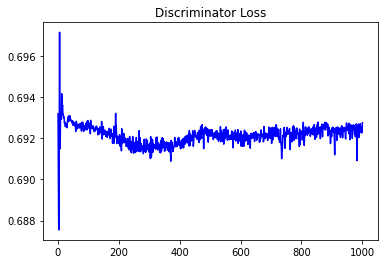

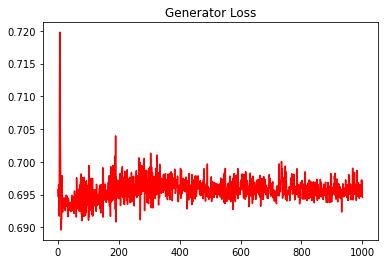

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1483525288377822


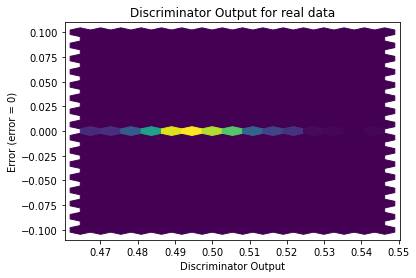

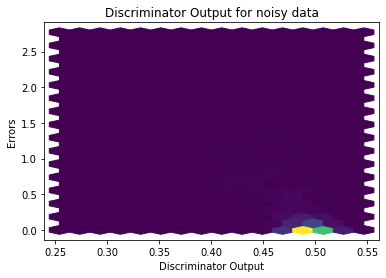

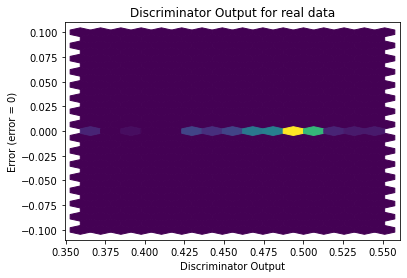

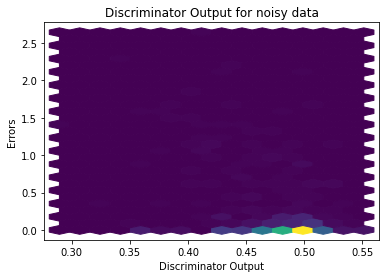

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


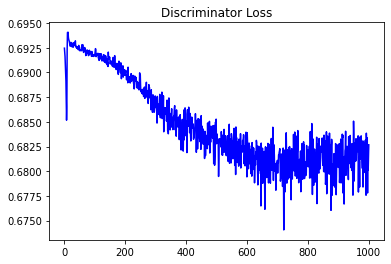

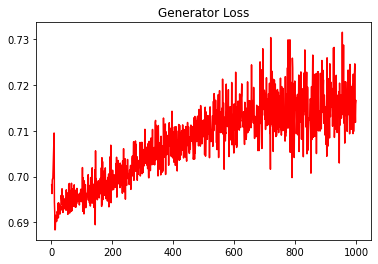

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.24883584197355108


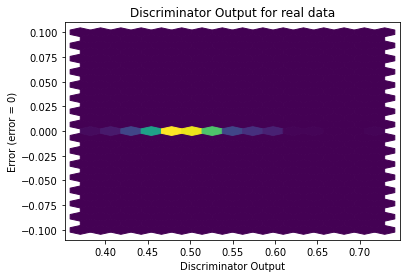

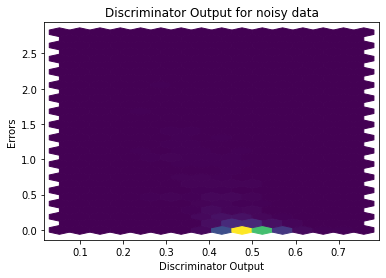

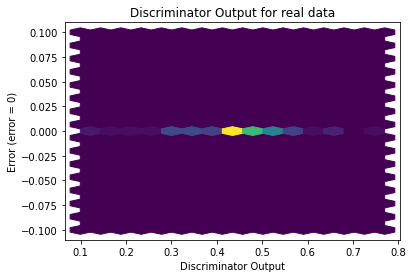

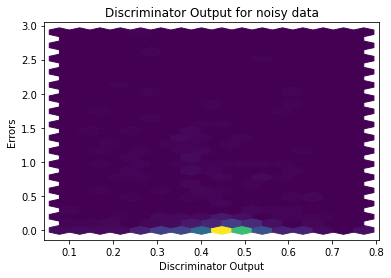

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2580]], requires_grad=True)
